In [1]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.datasets import make_spd_matrix
plt.rcParams["axes.grid"] = False

In [2]:
# define the number of samples to be drawn
n_samples = 100

In [3]:
# define the mean points for each of the systhetic cluster centers
t_means = [[8.4, 8.2], [1.4, 1.6], [2.4, 5.4], [6.4, 2.4]]

# for each cluster center, create a Positive semidefinite convariance matrix
t_covs = []
for s in range(len(t_means)):
    t_covs.append(make_spd_matrix(2))

X = []
for mean, cov in zip(t_means,t_covs):
    x = np.random.multivariate_normal(mean, cov, n_samples)
    X += list(x)
  
X = np.array(X)
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (400, 2)


In [5]:
t_covs

[array([[ 2.72159482, -0.03055394],
        [-0.03055394,  0.61668153]]),
 array([[ 2.49233806e+00, -2.10073736e-03],
        [-2.10073736e-03,  4.90538069e-01]]),
 array([[ 2.48235673, -0.10863767],
        [-0.10863767,  0.4114439 ]]),
 array([[2.41506824, 0.05265516],
        [0.05265516, 0.40181028]])]

In [5]:
# Create a grid for visualization purposes 
x = np.linspace(np.min(X[...,0])-1,np.max(X[...,0])+1,100)
y = np.linspace(np.min(X[...,1])-1,np.max(X[...,1])+1,80)
X_,Y_ = np.meshgrid(x,y)
pos = np.array([X_.flatten(),Y_.flatten()]).T
print(pos.shape)
print(np.max(pos[...,1]))

(8000, 2)
10.53100484735342


In [6]:
# define the number of clusters to be learned
k = 4

# create and initialize the cluster centers and the weight paramters
weights = np.ones((k)) / k
means = np.random.choice(X.flatten(), (k,X.shape[1]))
print(means)
print(weights)

[[ 2.40061101  2.29778697]
 [ 9.15896308  7.42322554]
 [ 8.38283976  8.71974138]
 [11.21018898  6.66685321]]
[0.25 0.25 0.25 0.25]


In [7]:
# create and initialize a Positive semidefinite convariance matrix 
cov = []
for i in range(k):
    cov.append(make_spd_matrix(X.shape[1]))
cov = np.array(cov)
print(cov.shape)

(4, 2, 2)


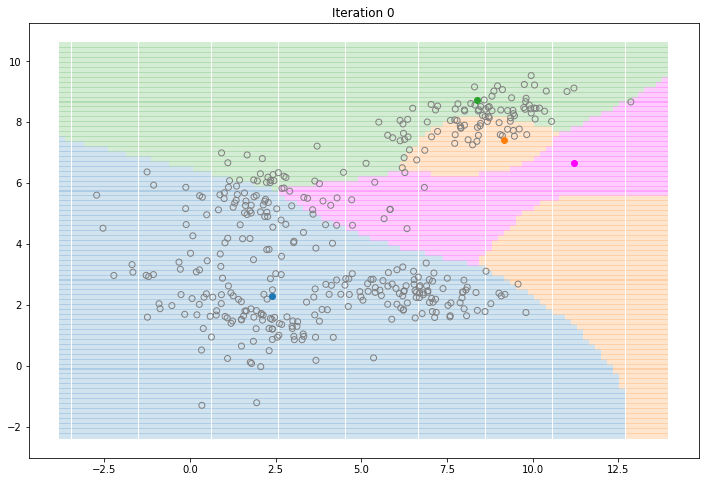

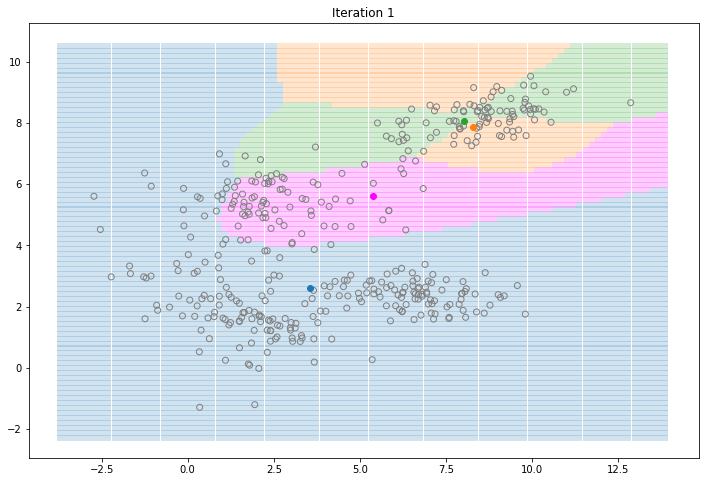

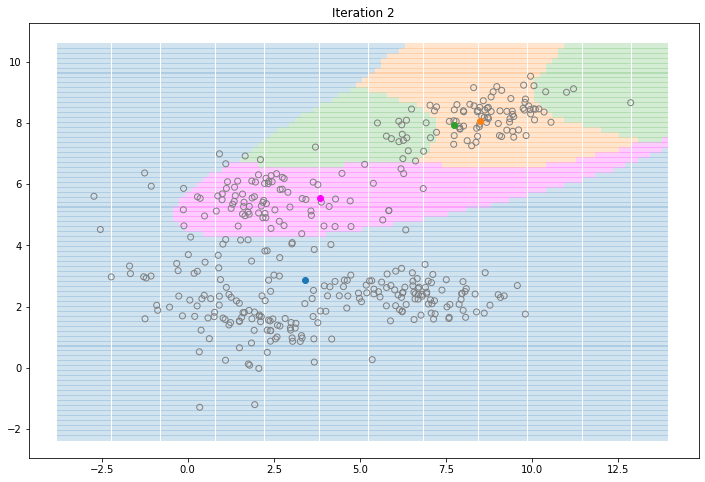

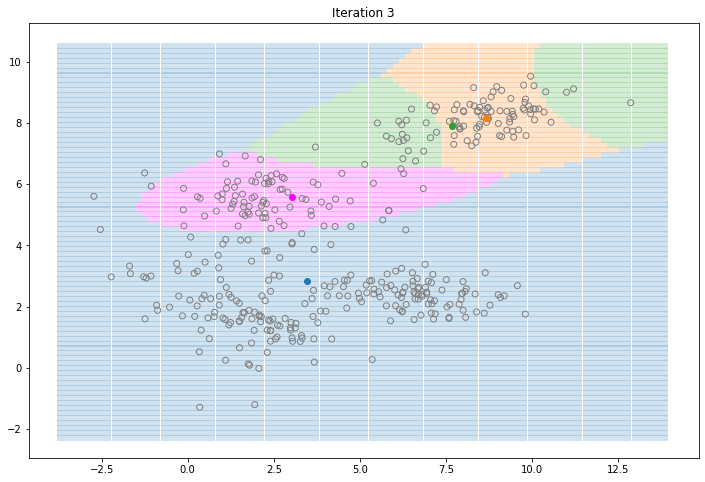

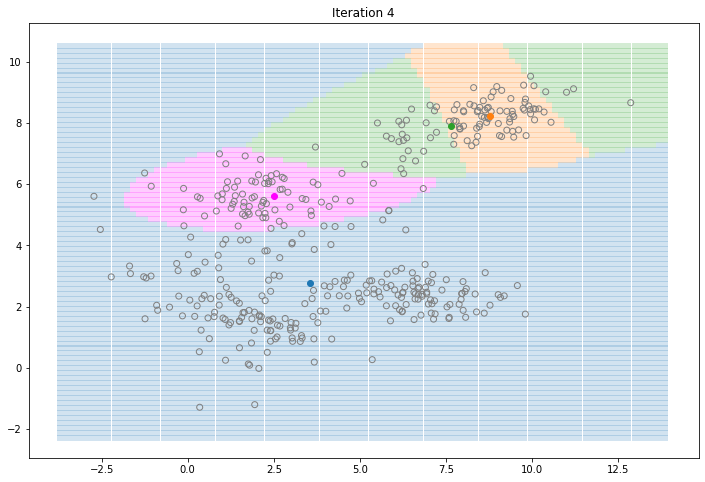

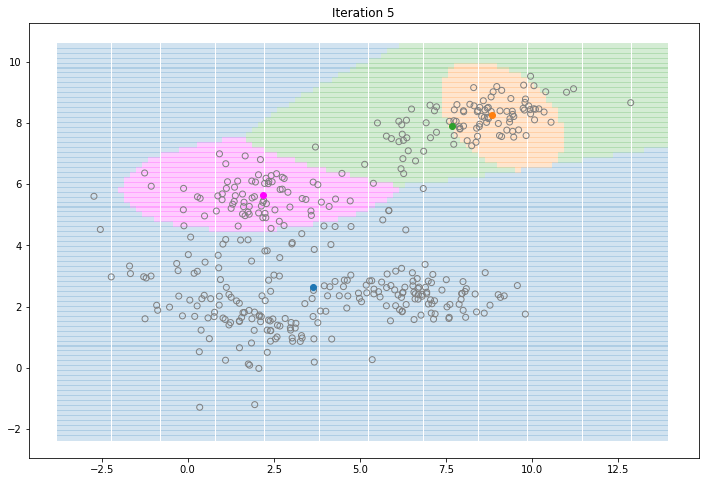

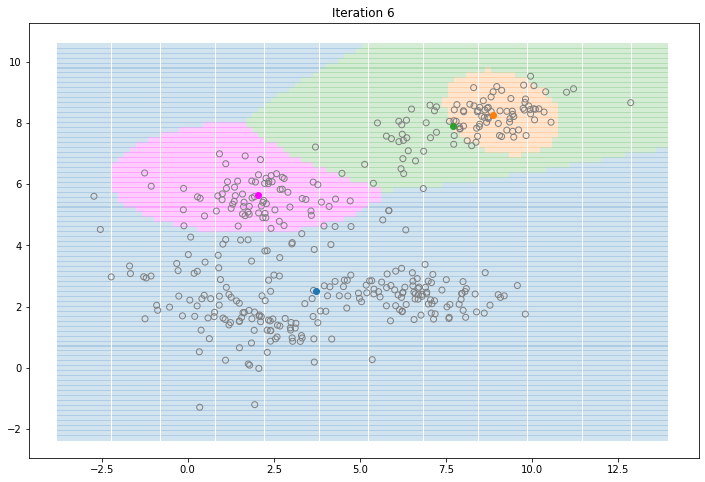

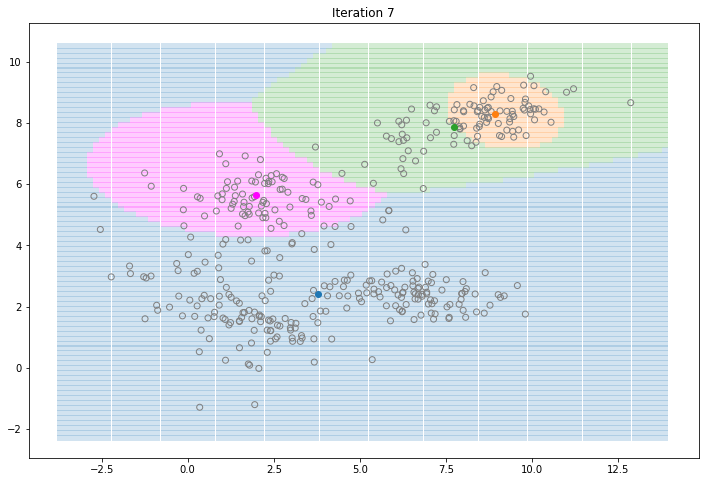

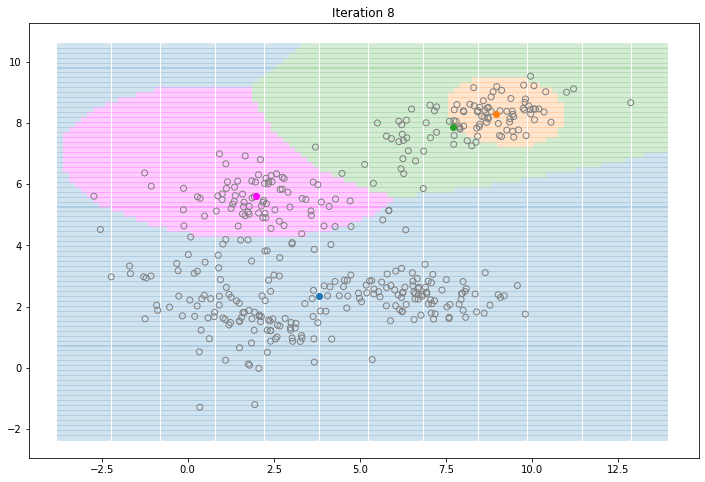

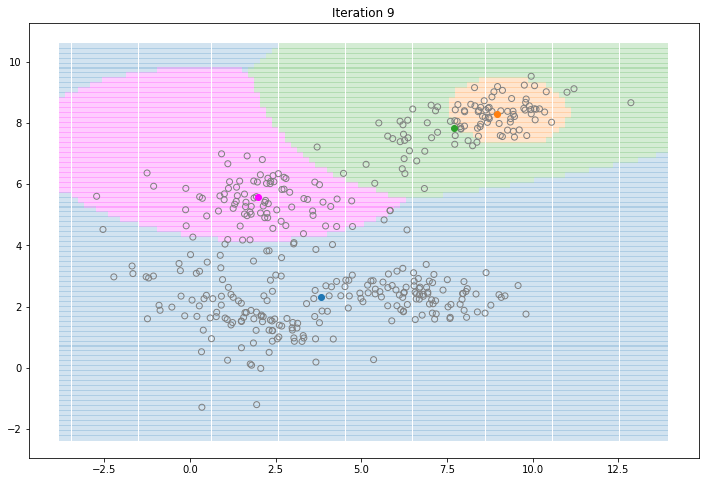

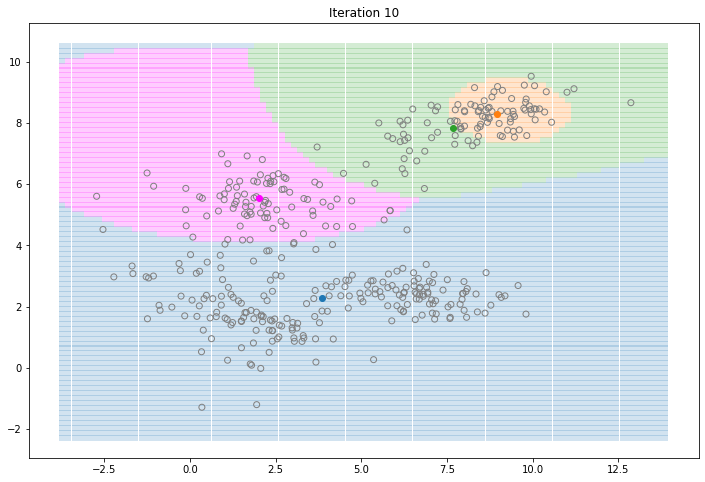

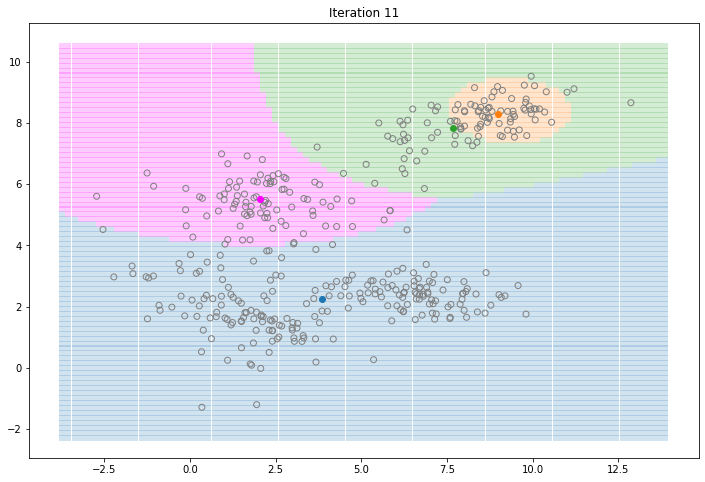

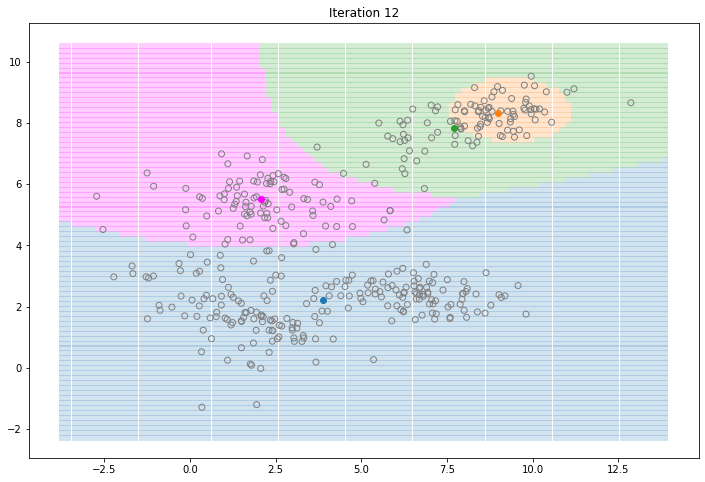

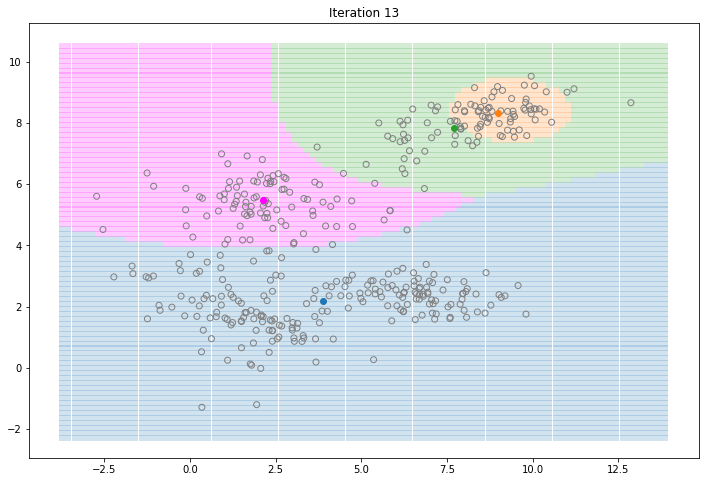

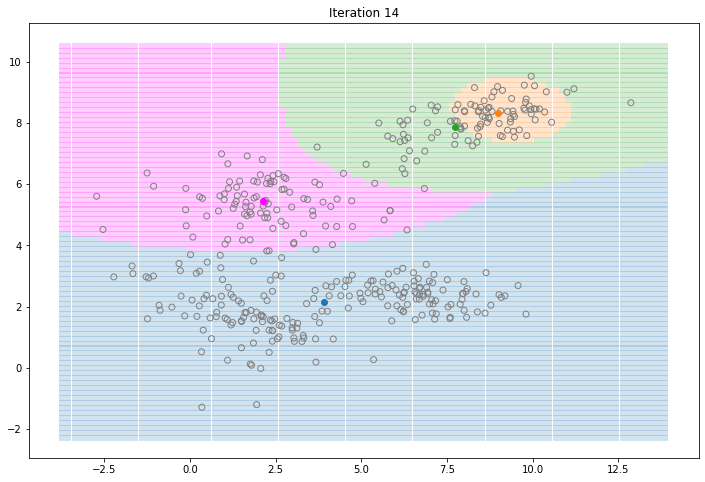

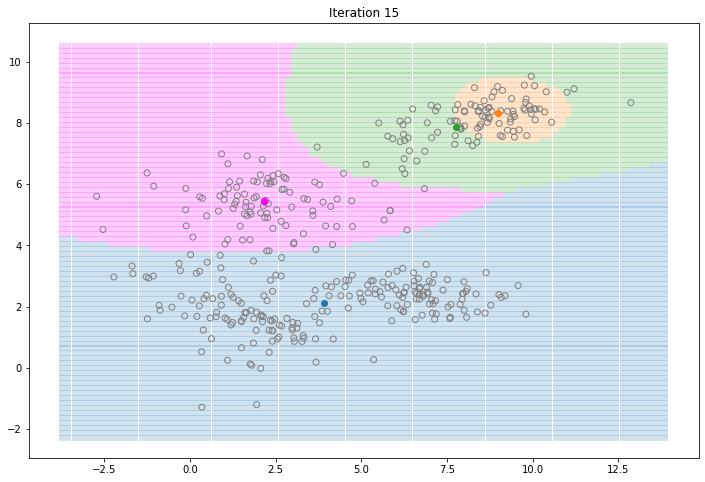

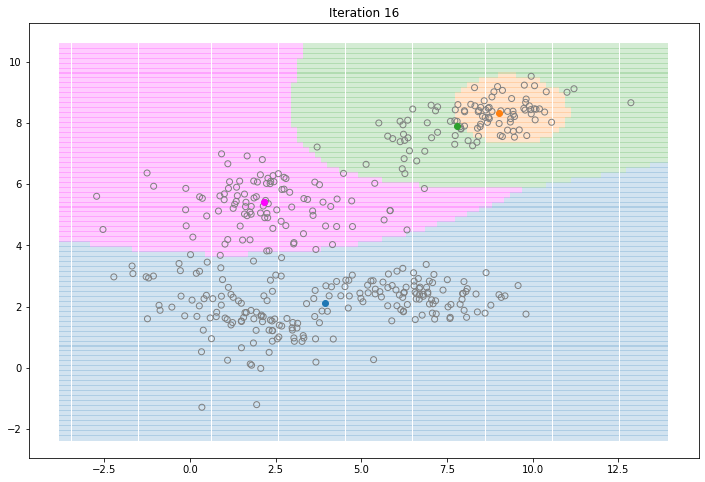

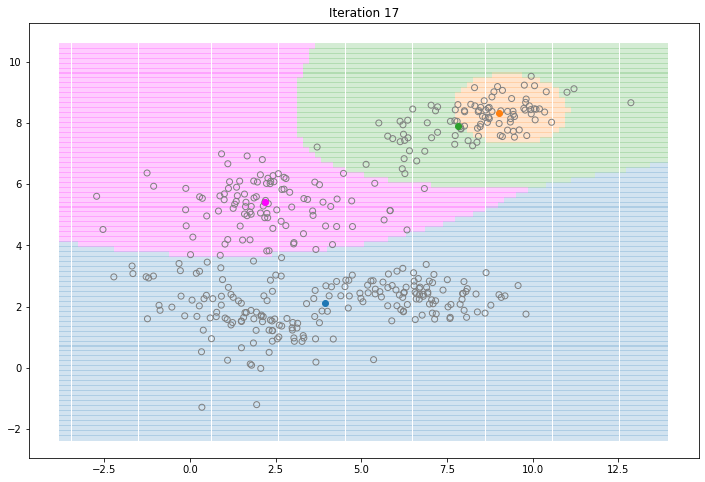

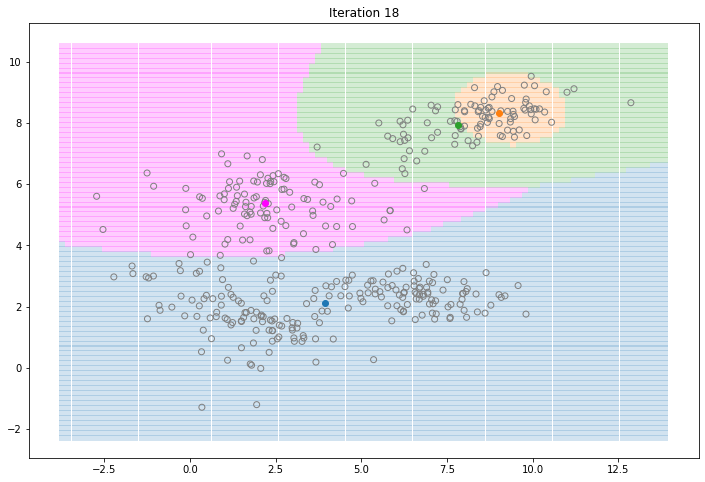

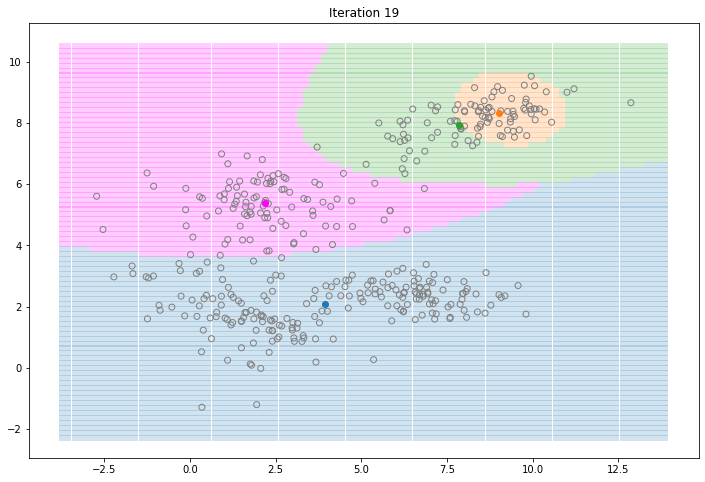

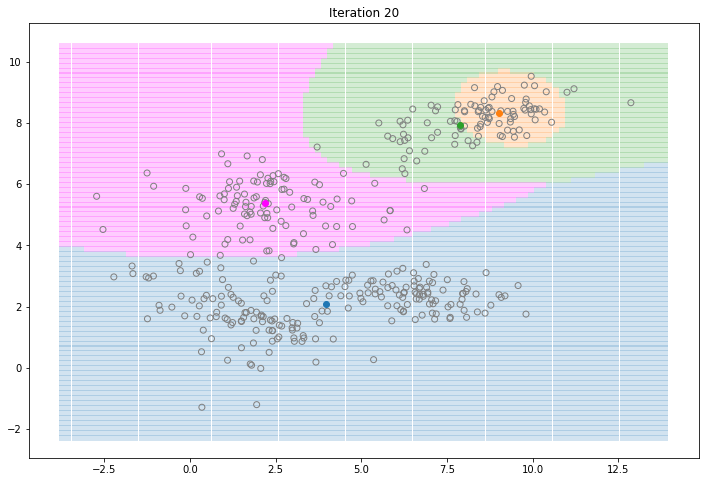

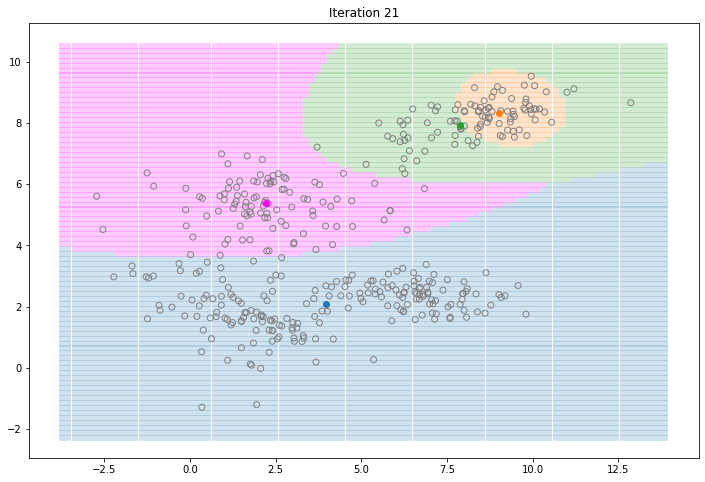

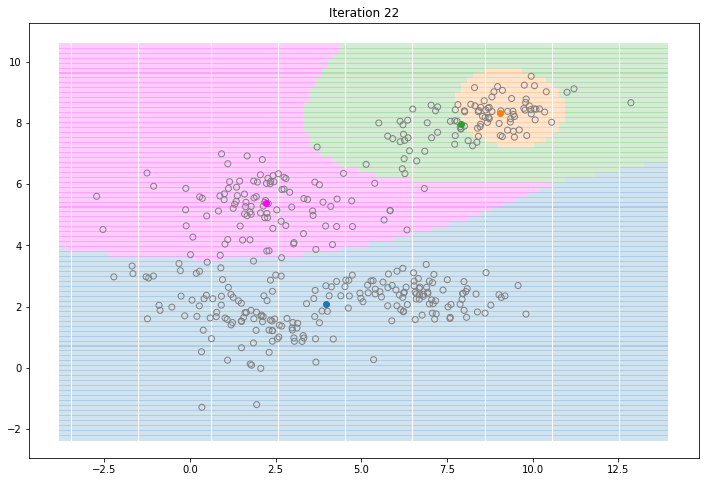

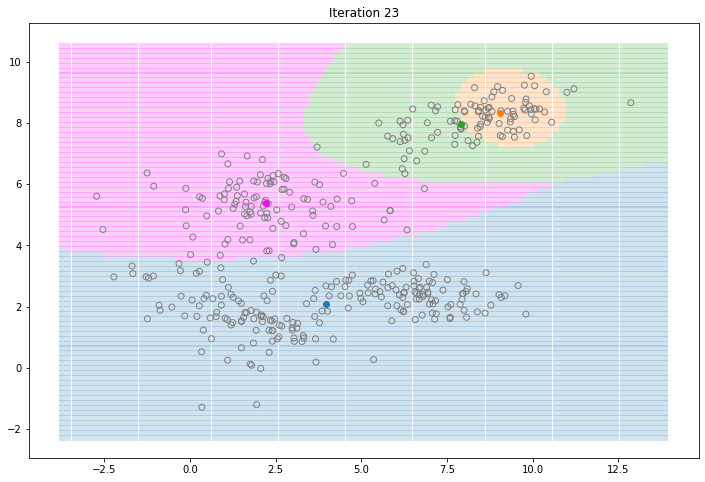

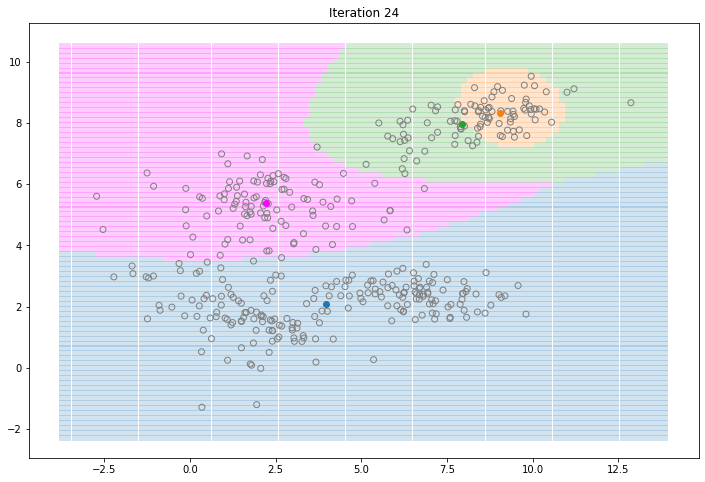

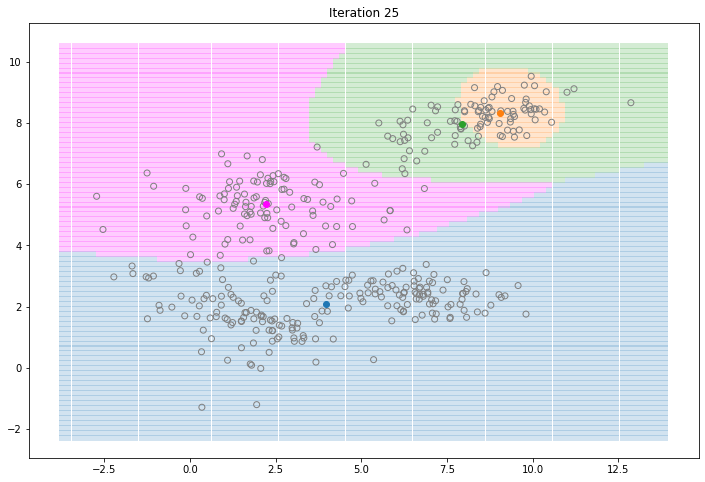

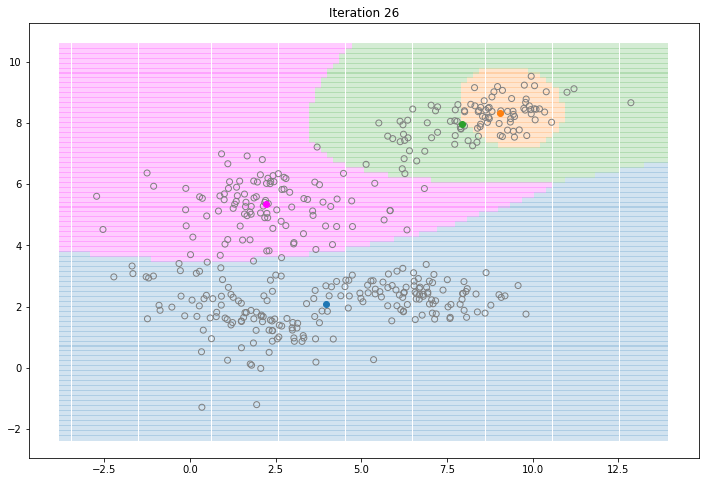

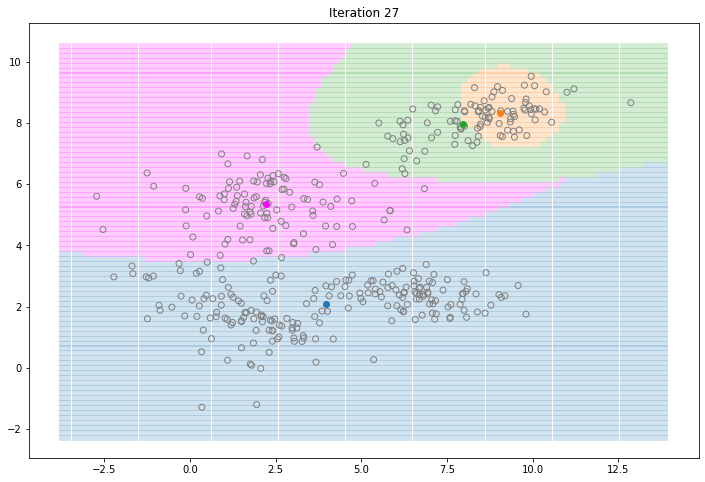

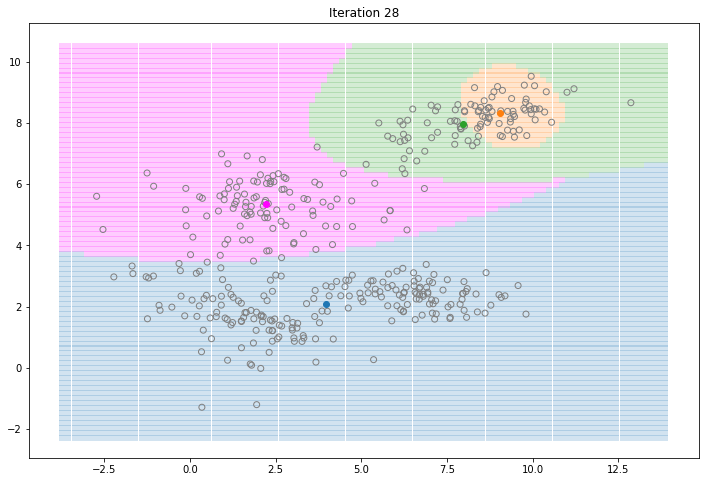

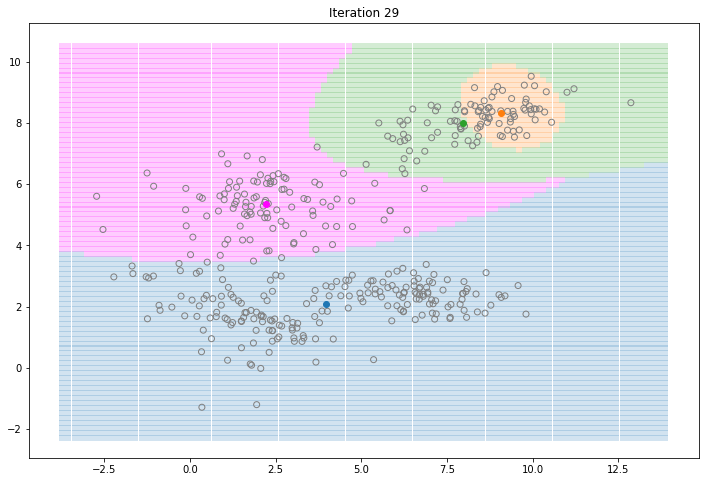

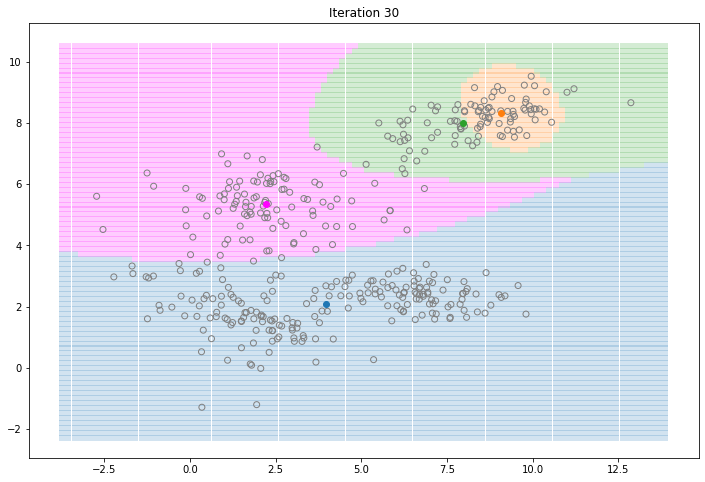

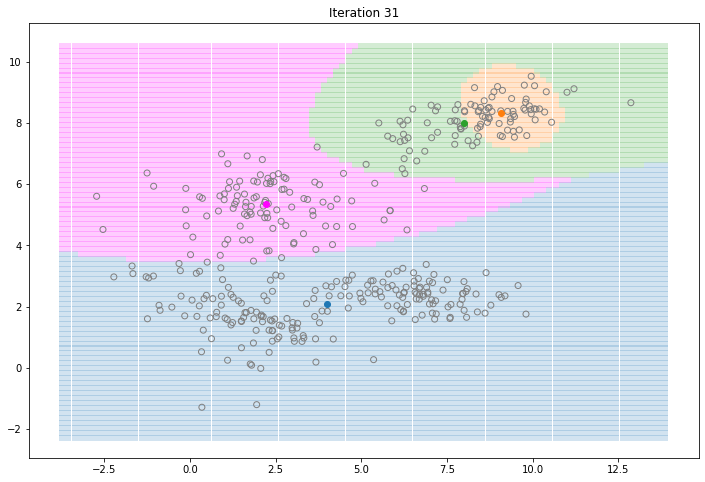

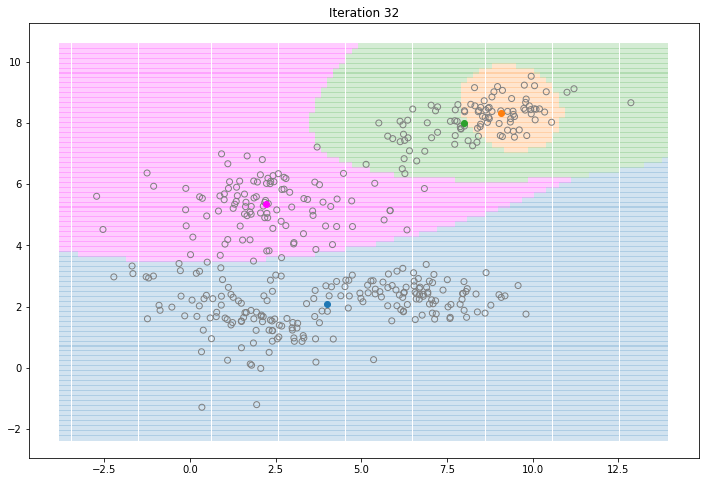

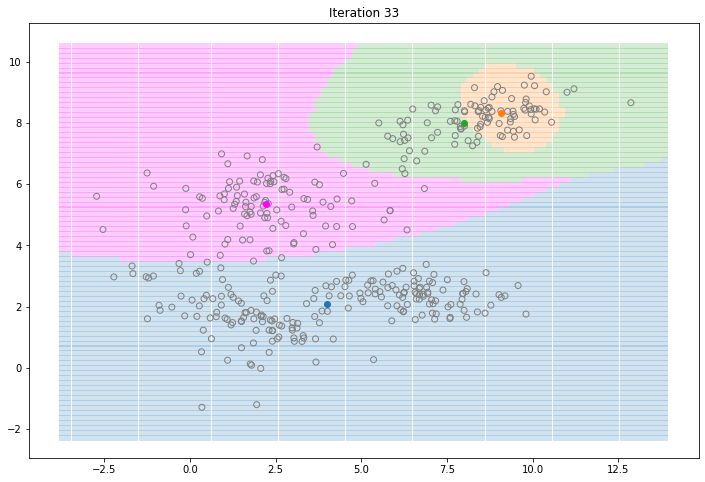

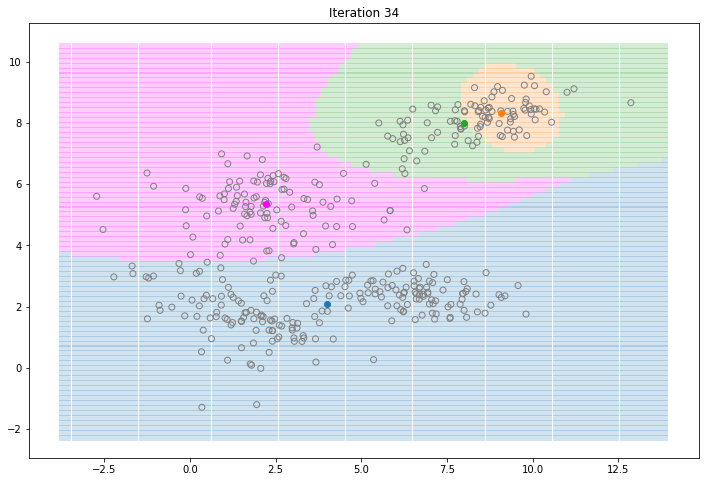

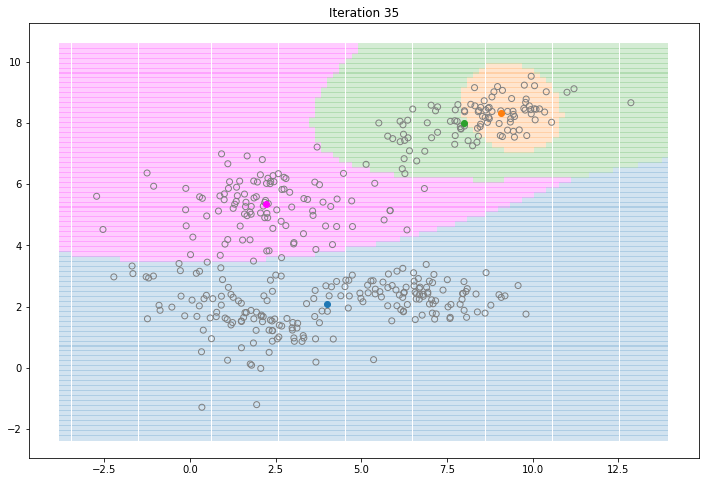

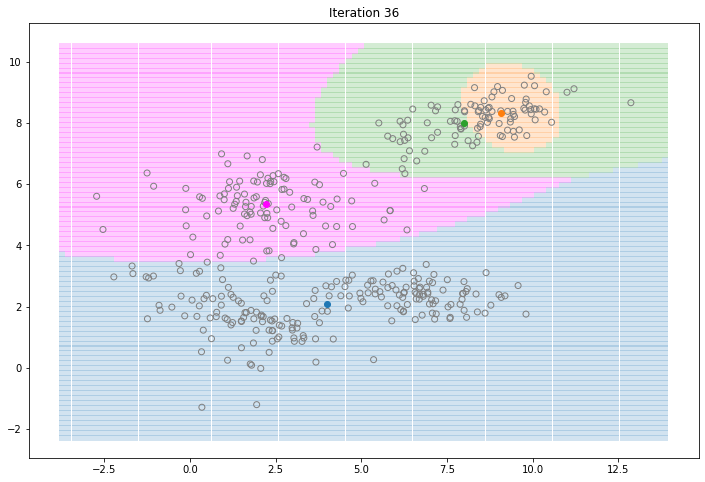

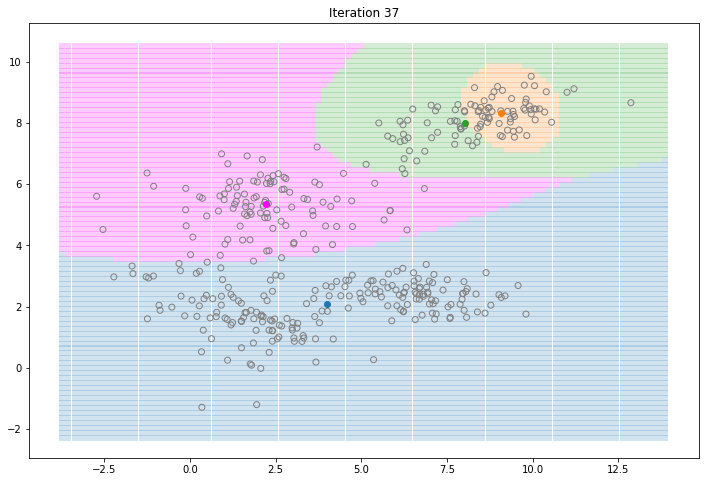

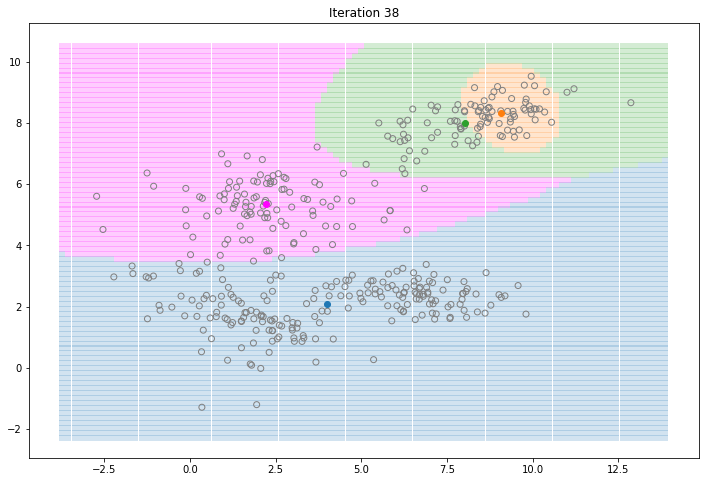

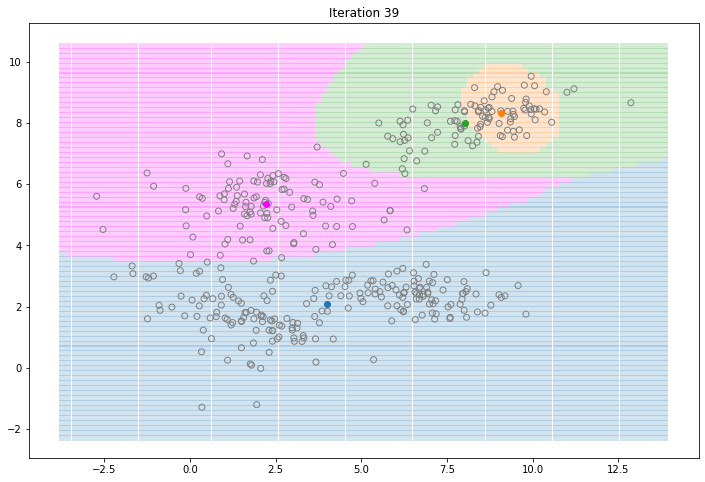

In [8]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'magenta', 'yellow', 'red', 'brown', 'grey']
eps=1e-8

# run GMM for 40 steps
for step in range(40):

  # visualize the learned clusters
  if step % 1 == 0:
    plt.figure(figsize=(12,int(8)))
    plt.title("Iteration {}".format(step))
    axes = plt.gca()
    
    likelihood = []
    for j in range(k):
        likelihood.append(multivariate_normal.pdf(x=pos, mean=means[j], cov=cov[j]))
    likelihood = np.array(likelihood)
    predictions = np.argmax(likelihood, axis=0)
    
    for c in range(k):
        pred_ids = np.where(predictions == c)
        plt.scatter(pos[pred_ids[0],0], pos[pred_ids[0],1], color=colors[c], alpha=0.2, edgecolors='none', marker='s')
    
    plt.scatter(X[...,0], X[...,1], facecolors='none', edgecolors='grey')
    
    for j in range(k):
        plt.scatter(means[j][0], means[j][1], color=colors[j])

    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()

  likelihood = []
  # Expectation step
  for j in range(k):
    likelihood.append(multivariate_normal.pdf(x=X, mean=means[j], cov=cov[j]))
  likelihood = np.array(likelihood)
  assert likelihood.shape == (k, len(X))
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian
    b.append((likelihood[j] * weights[j]) / (np.sum([likelihood[i] * weights[i] for i in range(k)], axis=0)+eps))

    # updage mean and variance
    means[j] = np.sum(b[j].reshape(len(X),1) * X, axis=0) / (np.sum(b[j]+eps))
    cov[j] = np.dot((b[j].reshape(len(X),1) * (X - means[j])).T, (X - means[j])) / (np.sum(b[j])+eps)

    # update the weights
    weights[j] = np.mean(b[j])
    
    assert cov.shape == (k, X.shape[1], X.shape[1])
    assert means.shape == (k, X.shape[1])

In [0]:
# !sudo apt-get update
# !sudo apt-get install ffmpeg imagemagick
# !convert -delay 35 -loop 0 *.png out_.gif